# Выбор нефтяной скважины для "ГлавРосГосНефть" 🛢

Мы работам в нефтедобывающей компании «ГлавРосГосНефть» нам предстоит решить, где бурить новую скважину.

Для работы нам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Нам необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

**Цели исследования**

1. По совокупности предоставленных характеристик выбрать наиболее прибыльный по добыче регион, с учетом рисков не окупить вложенные средства
2. Сформулировать объективные и понятные выводы по полученным результатам


**Ход исследования**

О качестве данных ничего не известно, поэтому требуется их предобработать.

Проанализируем данные с помощью доступных нам статистических инструментов, выявим и устраним возможные проблемы в них.

Разделим каждый из наборов с данными на две выборки: тренировочную и валидационную в соотношении 75:25 соответственно. Если потребуется, дополнительно предобработаем данные.

Обучим ML-модель и рассчитаем оцениваемые метрики для каждого региона.

Подготовим данные для рассчета прибыли и рисков. Проведем рассчеты. Отобразим результаты на графиках.

Подведем итоги, обоснуем окончательный выбор.

**Этапы исследования**
1. Обзор данных, EDA
2. Разделение данных, построение прогнозов с помощью ML-модели
3. Подготовка данных к рассчету прибыли и рисков
4. Итог

**Описание данных**
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Разведочный-анализ-данных-(EDA)-⌗" data-toc-modified-id="Разведочный-анализ-данных-(EDA)-⌗-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Разведочный анализ данных (EDA) ⌗</a></span><ul class="toc-item"><li><span><a href="#Используемые-библиотеки" data-toc-modified-id="Используемые-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Используемые библиотеки</a></span></li><li><span><a href="#Получение-исходных-данных" data-toc-modified-id="Получение-исходных-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Получение исходных данных</a></span></li><li><span><a href="#Обзор-исходных-данных" data-toc-modified-id="Обзор-исходных-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор исходных данных</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li><li><span><a href="#Выбросы" data-toc-modified-id="Выбросы-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выбросы</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Разделение-данных,-обучение-моделей-👨🏽‍🏫" data-toc-modified-id="Разделение-данных,-обучение-моделей-👨🏽‍🏫-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделение данных, обучение моделей 👨🏽‍🏫</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбиение данных</a></span></li><li><span><a href="#Стандартизация-значений-в-признаках" data-toc-modified-id="Стандартизация-значений-в-признаках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Стандартизация значений в признаках</a></span></li><li><span><a href="#Сохрание-и-чтение-предобработанных-наборов-с-данными" data-toc-modified-id="Сохрание-и-чтение-предобработанных-наборов-с-данными-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сохрание и чтение предобработанных наборов с данными</a></span></li><li><span><a href="#Обучение-моделей,-метрики" data-toc-modified-id="Обучение-моделей,-метрики-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение моделей, метрики</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Подготовка-данных,-рассчет-потенциальной-прибыли⏳" data-toc-modified-id="Подготовка-данных,-рассчет-потенциальной-прибыли⏳-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных, рассчет потенциальной прибыли⏳</a></span><ul class="toc-item"><li><span><a href="#Условия-решения-задачи" data-toc-modified-id="Условия-решения-задачи-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Условия решения задачи</a></span></li><li><span><a href="#Показатели-безубыточной-добычи-в-регионе" data-toc-modified-id="Показатели-безубыточной-добычи-в-регионе-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Показатели безубыточной добычи в регионе</a></span><ul class="toc-item"><li><span><a href="#Итого" data-toc-modified-id="Итого-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Рассчет-прибыли-с-учетом-рисков-⚠️" data-toc-modified-id="Рассчет-прибыли-с-учетом-рисков-⚠️-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Рассчет прибыли с учетом рисков ⚠️</a></span><ul class="toc-item"><li><span><a href="#Итого" data-toc-modified-id="Итого-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Разведочный-анализ-данных" data-toc-modified-id="Шаг-1.-Разведочный-анализ-данных-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Шаг 1. Разведочный анализ данных</a></span></li><li><span><a href="#Шаг-2.-Разделение-данных-на-наборы.-Обучение-моделей-Линейной-регрессии" data-toc-modified-id="Шаг-2.-Разделение-данных-на-наборы.-Обучение-моделей-Линейной-регрессии-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Шаг 2. Разделение данных на наборы. Обучение моделей Линейной регрессии</a></span></li><li><span><a href="#Шаг-3.-Подготовка-данных,-рассчет-потенциальной-прибыли" data-toc-modified-id="Шаг-3.-Подготовка-данных,-рассчет-потенциальной-прибыли-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Шаг 3. Подготовка данных, рассчет потенциальной прибыли</a></span></li><li><span><a href="#Шаг-4.-Рассчет-прибыли-с-учетом-рисков" data-toc-modified-id="Шаг-4.-Рассчет-прибыли-с-учетом-рисков-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Шаг 4. Рассчет прибыли с учетом рисков</a></span></li></ul></li><li><span><a href="#Что-могло-привести-к-получению-неполноценных-результатов?" data-toc-modified-id="Что-могло-привести-к-получению-неполноценных-результатов?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Что могло привести к получению неполноценных результатов?</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итог</a></span></li></ul></div>

## Разведочный анализ данных (EDA) ⌗

### Используемые библиотеки

In [1]:
!pip install pandas-profiling

In [2]:
import pandas as pd # Работа с наборами данных
import matplotlib.pyplot as plt  # Построение графиков
import seaborn as sns  # Построение графиков
import numpy as np # Работа с массивами


from ydata_profiling import ProfileReport # EDA

from sklearn.model_selection import train_test_split # Работа с наборами данных
from sklearn.preprocessing import StandardScaler # Стандартизация данных
from sklearn.linear_model import LinearRegression # Регрессионная ML-модель
from sklearn.metrics import mean_absolute_error, mean_squared_error # Оцениваемые метрики

import urllib # Получение данных с внешнего источника
import warnings # Предупреждения
from IPython.display import display, HTML # Отображение результатов
from tqdm import tqdm # Отображение результатов
from typing import Tuple # Аннотации

Настройки отображения

In [3]:
%matplotlib inline
pd.set_option('display.max_columns', 1000) # Макс кол-во отображаемых признаков
pd.set_option('display.max_rows', 50) # Макс кол-во отображаемых объектов
warnings.filterwarnings('ignore') # Убираем показ предупреждений

### Получение исходных данных

Прочитаем данные, обработаем возможные ошибки при их получении

In [4]:
try:
    datalist = []
    for i in tqdm(range(3)):
        try:
            datalist.append(pd.read_csv(
                f'https://code.s3.yandex.net/datasets/geo_data_{i}.csv'))
            print(f'✅ Датасет №{i+1} успешно прочитан c внешнего ресурса')
            display(datalist[i].head(10))
        except urllib.request.URLError:
            raise Exception(
                f'❌ Ошибка получения датасета №{i+1} с внешнего ресурса')


except:
    data_count = int(input(
        'Укажите кол-во датасетов для загрузки с локального хранилища (прим. \'3\'):\n'))
    datalist = []
    for i in range(data_count):
        data_name = input(
            f'Укажите имя файла №{i+1} с данными в каталоге с проектом. Например: "data.csv".\n'
            f'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n')

        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    datalist.append(pd.read_csv(data_path))
                    print(
                        f'✅ Датасет №{i+1} успешно прочитан по указанному пути')
                    display(datalist[i].head(10))
                    break

                except FileNotFoundError:
                    raise Exception(
                        f'❌Указан неверный путь к файлу: {data_path}')
        else:
            try:
                datalist.append(pd.read_csv(data_name))
                print(
                    f'✅ Датасет №{i+1} успешно прочитан из каталога с проектом')
                display(datalist[i].head(10))
            except FileNotFoundError:
                raise Exception(f'❌Указан не существующий файл: {data_name}')

data1, data2, data3 = datalist

  0%|                                                     | 0/3 [00:00<?, ?it/s]

✅ Датасет №1 успешно прочитан c внешнего ресурса


id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
5  wX4Hy  0.969570  0.489775 -0.735383   64.741541
6  tL6pL  0.645075  0.530656  1.780266   49.055285
7  BYPU6 -0.400648  0.808337 -5.624670   72.943292
8  j9Oui  0.643105 -0.551583  2.372141  113.356160
9  OLuZU  2.173381  0.563698  9.441852  127.910945

 33%|███████████████                              | 1/3 [00:00<00:01,  1.00it/s]

✅ Датасет №2 успешно прочитан c внешнего ресурса


id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
5  HHckp  -3.327590  -2.205276  3.003647   84.038886
6  h5Ujo -11.142655 -10.133399  4.002382  110.992147
7  muH9x   4.234715  -0.001354  2.004588   53.906522
8  YiRkx  13.355129  -0.332068  4.998647  134.766305
9  jG6Gi   1.069227 -11.025667  4.997844  137.945408

 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.13it/s]

✅ Датасет №3 успешно прочитан c внешнего ресурса


id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
5  LzZXx -0.758092  0.710691  2.585887   90.222465
6  WBHRv -0.574891  0.317727  1.773745   45.641478
7  XO8fn -1.906649 -2.458350 -0.177097   72.480640
8  ybmQ5  1.776292 -0.279356  3.004156  106.616832
9  OilcN -1.214452 -0.439314  5.922514   52.954532

100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.13it/s]


### Обзор исходных данных

Данные успешно прочитаны, поэтому приступим непосредственно к проведению разведочного анализа данных.

Для этого будем использовать инструмент `ProfileReport` из библиотеки `ydata_profiling`

In [5]:
ProfileReport(data1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
ProfileReport(data2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ProfileReport(data3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Пропусков нет. Проблем с типами данных тоже. Все становится чуть более интересно, если взглянуть на распределения значений признаков и их корреляцию во 2-ом регионе.

Распределения значений признаков в  1-ом и 3-ем регионов не вызывают особых претензий - большинство признаков в этих наборах распределены нормально или мультимодально (видны несколько отчетливых приков).

Но вот во 2-ом регионе наблюдается следующее:
- Очень сильная связь `f2` и `product`. Это может повлиять на значения измеряемых метрик (`MAE` и `RMSE`)
- Странная, относительно других наборов с данными, ситуация с признаком `product`: всего `12` уникальных значений, `>8%` значений равны `0`. Не исключено, что это особенность в данных, так как пропусков все таки нет, но стоит уточнить у тех, кто предоставил данные, не ошибка ли это.

Количество уникальных `id` не равно изначальному кол-ву объектов в данных, следовательно в данных присутствуют неявные дубликаты. Устраним их

### Устранение дубликатов

Явные:

In [8]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())
print(data3.duplicated().sum())

0
0
0


Неявные:

In [9]:
duplicated_ids = []

for i in range(1, 4):
    if i == 1:
        duplicated_ids.append(
            (i, data1.id.duplicated().sum(), list(data1[data1.id.duplicated()].index)))
    if i == 2:
        duplicated_ids.append(
            (i, data2.id.duplicated().sum(), list(data2[data2.id.duplicated()].index)))
    if i == 3:
        duplicated_ids.append(
            (i, data3.id.duplicated().sum(), list(data3[data3.id.duplicated()].index)))

duplicated_ids

[(1,
  10,
  [7530, 41724, 51970, 63593, 66136, 69163, 75715, 90815, 92341, 97785]),
 (2, 4, [41906, 82178, 82873, 84461]),
 (3, 4, [43233, 49564, 55967, 95090])]

18 повторяющихся по `id` объектов. Их не так много в каждом датасете по отдельности, поэтому удалим дубликаты и оставим первое вхождение

In [10]:
datasets = [data1, data2, data3]

In [11]:
for num, dataset in enumerate(datasets):
    dataset.drop(duplicated_ids[num][-1], axis=0, inplace=True)
    print(f'✅ В датасете №{num+1} успешно удалили неявные дубликаты')

✅ В датасете №1 успешно удалили неявные дубликаты
✅ В датасете №2 успешно удалили неявные дубликаты
✅ В датасете №3 успешно удалили неявные дубликаты


### Выбросы

Дополнительно взглянем на "ящики с усами" или **диаграммы размаха значений в признаках**. Вдруг и тут будут сюрпризы?)

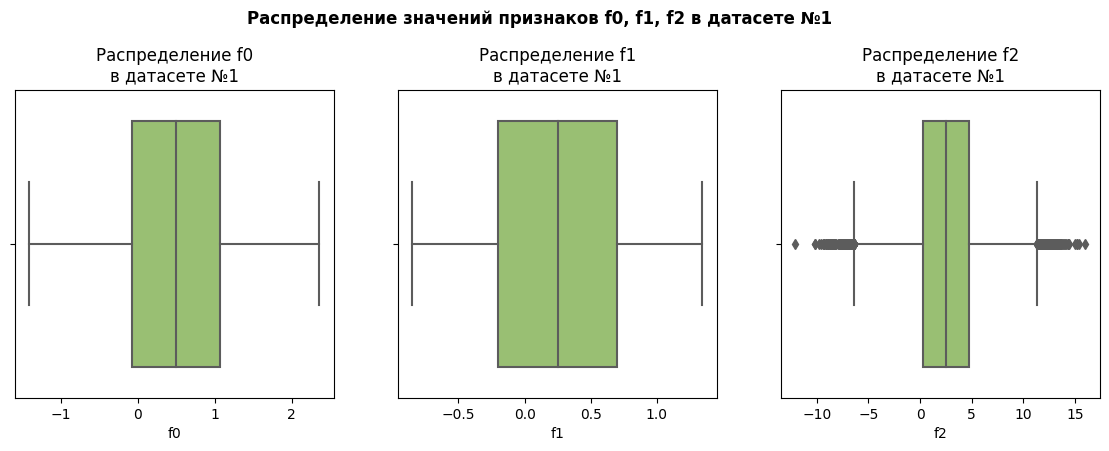

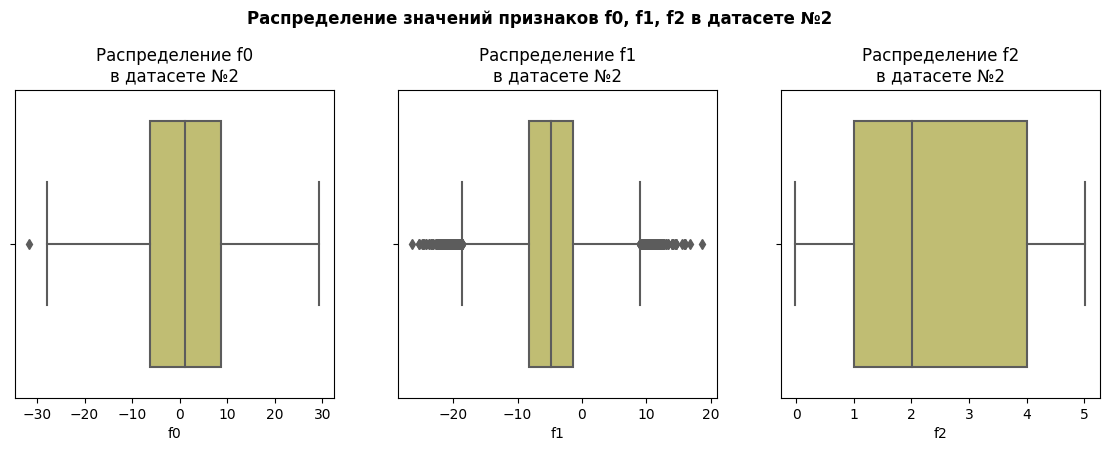

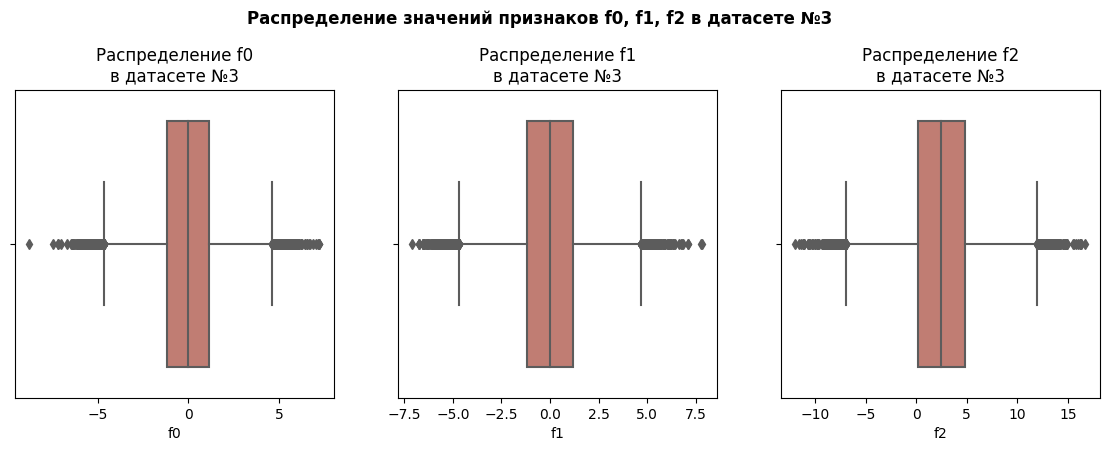

In [12]:
colors = ['#99CC66', '#CDC966', '#CD7466']
features = ['f0', 'f1', 'f2']

for (num, dataset), color in zip(enumerate(datasets), colors):
    fig, ax = plt.subplots(
        nrows=1,
        ncols=3,
        figsize=(14, 4),
        gridspec_kw={'width_ratios': [1, 1, 1]})

    fig.suptitle(
        f'Распределение значений признаков f0, f1, f2 в датасете №{num+1}',
        y=1.08,
        fontweight='semibold')

    for i, feature in enumerate(features):
        sns.boxplot(
            x=dataset[feature],
            color=color,
            ax=ax[i]
        )

        ax[i].set_title(
            f'Распределение {feature}\nв датасете №{num+1}')

В 3-ем регионе наблюдаются **выбросы**.

Быть уверенным в том, что это не является особенностью собранных в регионе данных, мы не можем, поэтому удаление таких объектов не слишком оправдано.

В остальном, критичных проблем не видно, но дополнительно убедимся в правильности выводов по графикам и посмотрим, сколько действительно таких выбросов. Если их не так много, то велика вероятность того, что это действительно выбросы, а не закономерность в данных

In [13]:
for num, dataset in enumerate(datasets):
    dataset = dataset[['f0', 'f1', 'f2']]
    Q3 = dataset.quantile(.75)
    Q1 = dataset.quantile(.25)
    IQR = Q3 - Q1

    print(f'Кол-во объектов с выбросами в каждом\n'
          f'отдельно взятом признаке в датасете №{num+1}\n')

    outliers_by_feature = (
        ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum())
    outliers_by_feature.name = f'Датасет №{num+1}'

    display(
        HTML(outliers_by_feature.to_frame().to_html()))
    print('\n\n')

Кол-во объектов с выбросами в каждом
отдельно взятом признаке в датасете №1






Кол-во объектов с выбросами в каждом
отдельно взятом признаке в датасете №2






Кол-во объектов с выбросами в каждом
отдельно взятом признаке в датасете №3



Судя по полученным значениям, это далеко не случайность, а вполне существующая закономерность. Так как полноценной информацией о входных данных мы не владеем, то исправлять ничего не будем и примем это как данность

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
**Пока можно сказать следующее:**

- Столбец `id` не нужен при обучении моделей, его отбросим. 
- Были обнаружены и удалены дублирующиеся по уникальному номеру объекты.
- Пропусков нет ни в одном датасете
- Проблем с типами данных признаков нет
- Во втором наборе данных (`data2`) в столбце `product` наблюдается странная ситуация: уникальных значений всего **12**, вследствие чего наблюдается корреляция с признаком `f2`, равная почти единице.
- Признак `f2` в принципе связан с `product` наиболее сильно в отличие от других признаков во всех регионах
- Каких-то критичных проблем в рапределениях значений не выявлено
- Данные нуждаются в **стандартизации**, так как будет использована модель линейной регрессии
    
Переходим к разбиению данных на выборки и построению процесса обучения моделей
</div>

## Разделение данных, обучение моделей 👨🏽‍🏫

### Разбиение данных

Исходные данные по каждому региону будут разледелы на два набора: обучающий и валидационный. Соотношение 75:25.

In [14]:
state = np.random.RandomState(42)

In [15]:
datakits = []


for num, dataset in enumerate(datasets):
    X_train, X_valid = train_test_split(
        dataset, test_size=.25, random_state=state)

    datakits.append((X_train, X_valid))

for num, datakit in enumerate(datakits):
    print(f'Датасет №{num+1}\n\n'
          f'\tРазмер тренировочного набора -> {datakit[0].shape}\n'
          f'\tРазмер валидационного набора -> {datakit[1].shape}\n\n\n')

Датасет №1

	Размер тренировочного набора -> (74992, 5)
	Размер валидационного набора -> (24998, 5)



Датасет №2

	Размер тренировочного набора -> (74997, 5)
	Размер валидационного набора -> (24999, 5)



Датасет №3

	Размер тренировочного набора -> (74997, 5)
	Размер валидационного набора -> (24999, 5)





### Стандартизация значений в признаках
Размер наборов верный.

Теперь стандартизируем признаки `f0`, `f1`, `f2` в обоих наборах данных по каждому региону при помощи `StandardScaler`

In [16]:
scale_cols = ['f0', 'f1', 'f2']

for datakit in datakits:
    scaler = StandardScaler()
    scaler.fit(datakit[0][scale_cols])
    datakit[0][scale_cols] = scaler.transform(datakit[0][scale_cols])
    datakit[1][scale_cols] = scaler.transform(datakit[1][scale_cols])

### Сохрание и чтение предобработанных наборов с данными

Признаки `f0`, `f1`, `f2` отстандартизированы, поэтому сохраним предобработанные для обучения моделей данные в директорию с проектом для удобства дальнейшей работы с ними.

In [17]:
datakit_labels = [
    ('train_1.csv',
     'valid_1.csv'),
    
    ('train_2.csv',
     'valid_2.csv'),
    
    ('train_3.csv',
     'valid_3.csv'),
]

for num, datakit in enumerate(datakits):
    datakit[0].to_csv(
        datakit_labels[num][0], index=False)
    datakit[1].to_csv(
        datakit_labels[num][1], index=False)

Наборы сохранены, теперь прочитаем фичи и таргет каждого из наборов в соответствующие переменные

In [18]:
X_train_1, y_train_1, X_valid_1, y_valid_1 = (
    pd.read_csv('train_1.csv').drop(columns=['product', 'id']),
    pd.read_csv('train_1.csv')['product'],
    pd.read_csv('valid_1.csv').drop(columns=['product', 'id']),
    pd.read_csv('valid_1.csv')['product']
)

X_train_2, y_train_2, X_valid_2, y_valid_2 = (
    pd.read_csv('train_2.csv').drop(columns=['product', 'id']),
    pd.read_csv('train_2.csv')['product'],
    pd.read_csv('valid_2.csv').drop(columns=['product', 'id']),
    pd.read_csv('valid_2.csv')['product']
)

X_train_3, y_train_3, X_valid_3, y_valid_3 = (
    pd.read_csv('train_3.csv').drop(columns=['product', 'id']),
    pd.read_csv('train_3.csv')['product'],
    pd.read_csv('valid_3.csv').drop(columns=['product', 'id']),
    pd.read_csv('valid_3.csv')['product']
)

datasets = [
    (X_train_1, y_train_1, X_valid_1, y_valid_1),
    (X_train_2, y_train_2, X_valid_2, y_valid_2),
    (X_train_3, y_train_3, X_valid_3, y_valid_3)
]

### Обучение моделей, метрики

Данные полностью подготовлены к обучению моделей.

In [19]:
results = []

for i, kit in enumerate(datasets):
    X_train, y_train, X_valid, y_valid = kit[0], kit[1], kit[2], kit[3]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    preds = model.predict(X_valid)
    
    # Считаем и сохраняем показатели:
        # Предсказанные значения
        # Истинные значения
        # Среднее предсказанное значение объема сырья
        # Среднее истинное значение объема сырья
        # Cредняя абсолютная ошибка
        # Среднеквадратическая ошибка
    
    results.append(
        (preds,
         y_valid,
         np.mean(preds), 
         np.mean(y_valid), 
         mean_absolute_error(y_valid, preds), 
         mean_squared_error(y_valid, preds) ** .5)
    )

Предсказания и метрики, полученнные на валидационном наборе, записали в `results`.

Чуть адаптируем внешний вид результатов, записав их в датафрейм.

In [20]:
df_results = pd.DataFrame(
    data=[(result[2], result[3], result[4], result[5]) for result in results],
    columns=[
        'Mean predicted \'Product\'',
        'Mean valid data \'Product\'',
        'MAE on valid data',
        'RMSE on valid data'
    ],
    index=[f'Region №{num+1}' for num in range(len(results))]
)
df_results

Mean predicted 'Product'  Mean valid data 'Product'  \
Region №1                 92.609840                  92.388766   
Region №2                 68.894060                  68.898780   
Region №3                 95.155745                  95.025315   

           MAE on valid data  RMSE on valid data  
Region №1          31.033457           37.685089  
Region №2           0.715962            0.888986  
Region №3          32.647623           39.845039

Согласно полученным результатам, *модель показывает наилучшее качество на данных из второго региона.*

**НО!** Из этапа EDA помним, что показатели в данных 2-ого региона несколько отличаются от таковых в других наборах.

Выясним далее, не повлияет ли это на получение достоверных выводов.

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого

* Подготовили данные для обучения моделей
    * Каждый датасет разделили на обучающую и тренировочную выборки в соотношении 75:25 соответственно
    * Стандартизировали значения признаков в каждом из полученных наборов
* Обучили модель линейной регрессии и собрали результаты в <tt>df_results</tt>
    * По значениям метрик <tt>MAE</tt> и <tt>RMSE</tt> модель очень хорошо научилась предсказывать таргет во втором регионе, но такое сильный отрыв может быть связан с тем, что во втором регионе изначально таргет представлял из себя пул из 12-ти уникальных значений, поэтому 1-ый и 3-ий регионы списывать со счетов рано.
    * В 1-ом и 3-ем регионах **наблюдаются значения метрики <tt>RMSE</tt> выше, чем <tt>MAE</tt>**, что свидетельствует о наличии выбросов, которые мы наблюдали при проведении EDA, а также о том, что модель плохо научилась их определять. Все таки у нас модель линейной регрессии, а не полиномиальной.

## Подготовка данных, рассчет потенциальной прибыли⏳

### Условия решения задачи

Для удобства проведения дальнейших рассчетов сохраним необходимые значения в отдельные переменные.

Речь идет о следующих условиях решения поставленной задачи:
- При разведке региона исследуют `500 точек`, из которых с помощью машинного обучения выбирают `200 лучших` для разработки.
- Бюджет на разработку скважин в регионе — `10 млрд рублей`.
- При нынешних ценах один баррель сырья приносит `450 рублей дохода`. Доход с каждой единицы продукта составляет `450 тыс. рублей`, поскольку объём указан в `тысячах баррелей`.
- После оценки рисков нужно оставить лишь те регионы, в которых `вероятность убытков меньше 2.5%`. Среди них выбирают регион с `наибольшей средней прибылью`.

In [21]:
oilfields = 500 # Исследуют 500 точек

best_oilfields = 200 # Из них 200 лучших

budget = 1e10 # Бюджет на разработку скважин в регионе

barrel_profit = 450 # Один баррель сырья приносит в руб.

unit_profit = barrel_profit * 1000 # Единица продукта равна 1 тыс. бар., поэтому приносит в 1000 раз больше

loss_prob = 2.5 # Вероятность убытков должна быть меньше этого значения в процентах

### Показатели безубыточной добычи в регионе

Рассчитаем, **какими показателями по объему сырья должен обладать регион** и **сколько минимально нефти в тыс. бар. должна содержать каждая скважина в нем**, чтобы ее добыча была **безубытычной**.

In [22]:
min_region_volume = budget / unit_profit
print(f'Минимально {np.round(min_region_volume, 2)} тыс. баррелей')

Минимально 22222.22 тыс. баррелей


**Безубыточный регион** = добыть и продать от `22222.22 тыс. баррелей нефти`. Так и запишем...

При условии этого, из каждой скважины мы должны добыть:

In [23]:
min_oilfield_volume = min_region_volume / best_oilfields
print(
    f'При этом каждая скважина должна содержать более {np.round(min_oilfield_volume, 2)} тыс. баррелей нефти')

При этом каждая скважина должна содержать более 111.11 тыс. баррелей нефти


Что ж, посмотрим как обстоят дела в каждом регионе с безубыточностью добычи.

Сравним полученные минимальные значения объема продукта со средними предсказанными моделью значениями в каждом регионе.

In [24]:
df_data = {
    'Mean predicted volume in region' : df_results['Mean predicted \'Product\''],
    'Min volume required' : [min_oilfield_volume]*len(df_results)
}

break_even_df = pd.DataFrame(
    df_data, index=[f'Region №{num+1}' for num in range(len(results))])

break_even_df['Volume difference'] = (
    break_even_df['Mean predicted volume in region'] - break_even_df['Min volume required'])

break_even_df

Mean predicted volume in region  Min volume required  \
Region №1                        92.609840           111.111111   
Region №2                        68.894060           111.111111   
Region №3                        95.155745           111.111111   

           Volume difference  
Region №1         -18.501271  
Region №2         -42.217051  
Region №3         -15.955366

Удручает конечно, что нельзя просто так взять и выбрать случайные месторождения в регионе, и твоя прибыль окажется в 100500 раз больше затраченного(

#### Итого
**Ни в одном регионе выбор скважин наобум не дает хороших результатов**, поэтому стоит отобрать 200-лучших из них и посчитать прибыль следующим образом:
- Для каждого региона выбрать 200 лучших точек, путем сортировки данных
- Посчитать конечную прибыль, учитывая затраты
- В конце построим гистограмму прибыльности среди всех регионов

In [25]:
def region_profit(target, predictions, best_count):
    preds_info = sorted(zip(
        np.array(target), predictions), key=lambda x: x[1], reverse=True)[:best_count]

    top_predicted = [real for real, pred in preds_info]

    return ((unit_profit * sum(top_predicted)) - budget) / 1e9

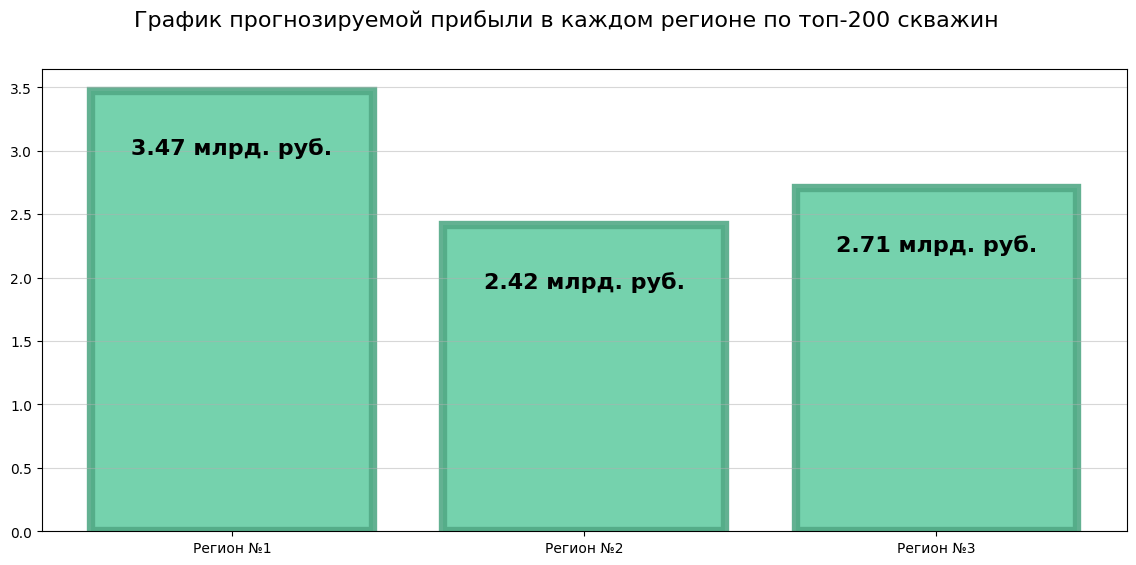

In [26]:
region_profits = []

for i in range(3):
    region_profits.append(
        region_profit(results[i][1], results[i][0], best_oilfields)
    )

# Построим график

fig, ax = plt.subplots(figsize=(14, 6))

fig.suptitle('График прогнозируемой прибыли в каждом регионе по топ-200 скважин',
             fontsize=16, fontweight=16)

ax.bar(['Регион №1', 'Регион №2', 'Регион №3'], region_profits,
       color='#66CDA4', alpha=.9, edgecolor='#52A986', linewidth=6)
ax.grid(axis='y', alpha=.5)


for rect, label in zip(ax.patches, region_profits):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height - .5,
        f'{np.round(label, 2)} млрд. руб.',
        ha="center",
        fontweight='bold', fontsize=16
    )

Значения прибыли посчитаны и отражены в сравнении на графике выше.

**Регион №1** показывает наибольшее значение.

Но насколько велик риск не получить столько?

С этим разберемся дальше: воспользуемся техникой `bootstrap`

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого

- Рассчитали показатели объема добытого сырья в регионе из из одной скважины региона, чтобы добыча стала безубыточной.
- Сравнили их со средними предсказанными значениями и выяснили, что требуется отбор скважин, чтобы добыча приносила прибыль
- Отобрали 200 лучших скважин по совокупности характеристик, которые учитывала наша модель. Для них посчитали предполагаемую прибыль. Сделали так для каждого региона
- Отразили полученные результаты на графике: пока по прибыли лидирует **Регион №1**
</div>

## Рассчет прибыли с учетом рисков ⚠️

Для рассчета рисков "не получить желаемую прибыль" воспользуемся техникой `bootstrap` на `1000 выборок`.

Напишем одноименную функцию, которая выполнит ее для одного набора, а после применим ее ко всем данным и отобразим результаты на графиках

In [27]:
def bootstrap(
    target: np.array, 
    predictions: np.array, 
    points_amount: int,
    best_points_amount: int,
    interval_treshold: float) -> Tuple:
    
    samples_results = []

    for i in range(1000):
        target_sample = target.sample(
            n=points_amount, random_state=state, replace=True)
        predictions_sample = predictions[target_sample.index]
        profit = region_profit(
            target_sample, predictions_sample, best_points_amount)
        samples_results.append(profit * 1e3)

    result = pd.Series(samples_results)
    lower_quantile = result.quantile(np.round((1-interval_treshold)/2, 6))
    upper_quantile = result.quantile(np.round(1-((1-interval_treshold)/2), 6))
    avg = result.mean()
    risk = (result < 0).mean()
    
    return lower_quantile, upper_quantile, avg, risk

Теперь воспользуемся созданной функцией и рассчитаем для каждого региона:
- Среднее значение прогнозируемой прибыли после проведения бутстрапа
- Доверительный интервал - интервал, в который наша реальная итоговая прибыль скорее всего попадет
- С помощью результатов из предыдущего пункта посчитаем процентное значение рискованности вложения средств в разработку топ-200 скважин в конкретном регионе

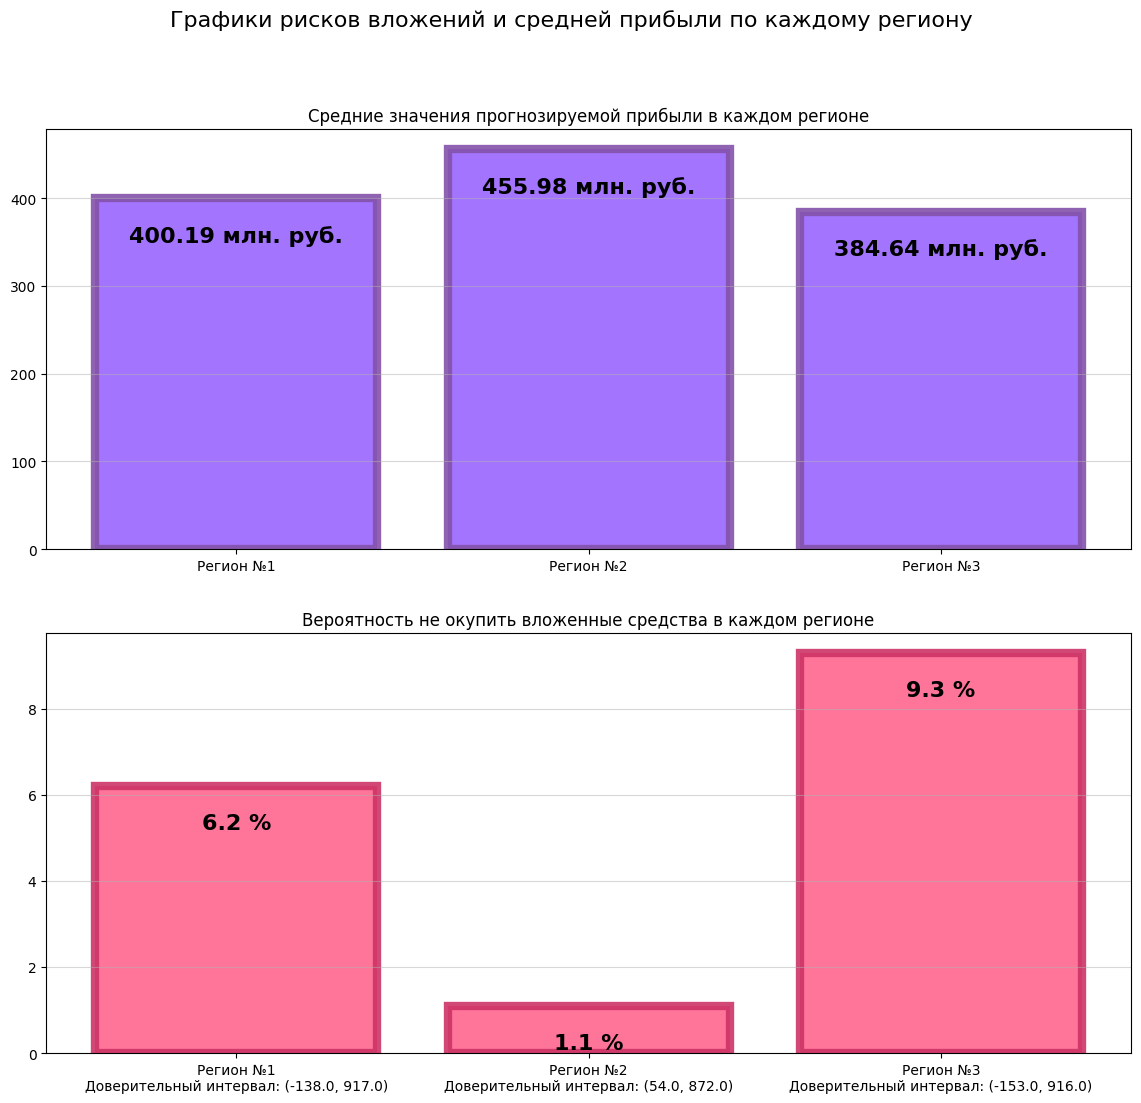

In [28]:
bootstrap_results = []

for num, dataset in enumerate(datasets):
    preds = results[num][0]
    real_values = results[num][1]
    
    lq, uq, avg, risk = bootstrap(real_values, preds, oilfields, best_oilfields, 0.95)
    
    bootstrap_results.append(
        (avg, (np.round(lq, 0), np.round(uq, 0)), risk)
    )

# Построим график

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(14, 12))

fig.suptitle('Графики рисков вложений и средней прибыли по каждому региону',
             fontsize=16, fontweight=16)

ax[0].bar(
    ['Регион №1', 'Регион №2', 'Регион №3'], 
    [bs_res[0] for bs_res in bootstrap_results],
    color='#9966FF', alpha=.9, edgecolor='#8352A9', linewidth=6)
ax[0].set_title('Средние значения прогнозируемой прибыли в каждом регионе')
ax[0].grid(axis='y', alpha=.5)

conf_intervals = [bs_res[1] for bs_res in bootstrap_results]

ax[1].bar(
    [f'Регион №1\nДоверительный интервал: {conf_intervals[0]}', 
     f'Регион №2\nДоверительный интервал: {conf_intervals[1]}', 
     f'Регион №3\nДоверительный интервал: {conf_intervals[2]}'],
    [bs_res[2]*100 for bs_res in bootstrap_results],
    color='#FF668F', alpha=.9, edgecolor='#CC3366', linewidth=6)
ax[1].set_title('Вероятность не окупить вложенные средства в каждом регионе')
ax[1].grid(axis='y', alpha=.5)


annotations = [
    ([bs_res[0] for bs_res in bootstrap_results], 50, 'млн. руб.'), 
    ([bs_res[2]*100 for bs_res in bootstrap_results], 1, '%')
]

for i, (labels, y_value, annotation) in enumerate(annotations):
    for j, value in enumerate(labels):
        ax[i].text(
            j,
            value - y_value,
            f'{np.round(value, 2)} {annotation}',
            ha="center",
            fontweight='bold', fontsize=16
        )

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого

- Создали функцию `bootstrap`, которая выполняет одноименную технику для каждого из наборов. Ее использование помогло оценить реалистичные значения прибыли, которую получим, если рационально выберем места для разработки скважин.
- Пользуясь техникой бутстреп сделали следующее:
    - Вычислили средние значения прибыли в каждом регионе, построили график
    - Вычислили доверительные интервалы прибыли в каждом из регионов и рассчитали риски вложения средств в каждый из регионов

По совокупности факторов наилучшим выбором для разработки скважин будет - **`Регион №2`**.
    
Исходя из наших прогнозов, именно в нем, относительно других регионов:
1. Вожможна наибольшая прибыль.
2. Доверительный интервал содержит только положительные значения доходов
3. Наблюдаются минимальные и подходящие под условия решения поставленной задачи риски потери вложенных средств. (Риск потери средств должен быть **менее 2.5%**. В нашем случае он принимает следующие значения: **`~0.8%-1.5%`**)
</div>

## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">

Для проведения анализа нам были предоставлены данные с характеристиками нефтяных месторождений в трех различных регионах. Подробного описания данных предоставлено не было, в целях конфиденциальности информации фирмы. По совокупности предоставленных показателей требовалось оценить, какой из регионов окажется наиболее прибыльным при разработке скважин в нем, а также оценить риск не окупить вложенные средства.

### Краткая сводка по выполненным задачам

#### Шаг 1. Разведочный анализ данных
- Импорт библиотек. Настройка рабочей среды.
- Получение исходных данных с обработкой оишбок.
- Обзор наборов с данными при помощи статистических инструментов. Поиск возможных проблем в данных
- Устранение дубликатов
- Оценка влияния значений-выбросов
- Итоги шага

#### Шаг 2. Разделение данных на наборы. Обучение моделей Линейной регрессии
- Разделение каждого из датасетов на тренировочную и валидационную выборки в соотношении 75:25
- Стандартизация значений в признаках. Локальное сохранение предобработанных наборов с данными
- Обучение моделей, рассчет метрик для каждого набора с данными
- Описание полученных результатов

#### Шаг 3. Подготовка данных, рассчет потенциальной прибыли
- Рассчитаны характеристики региона и скважин в регионе, при которых их разработка безубыточна
- Построен график, описаны результаты

#### Шаг 4. Рассчет прибыли с учетом рисков
- Применена техника `Bootstrap` для более точной и реальной оценки значений потенциальной прибыли в каждом из регионов
- Рассчитаны средние показатели по прибыли и риски неокупаемости для каждого региона
- Все показатели оценены в совокупности и выбран наиболее перспективный регион
    
### Что могло привести к получению неполноценных результатов?
- Данные "синтетические", нет полноценной информации о происхождении исследуемых величин
- Малое количество учитываемых в прогнозировании признаков. Мало того, что не понятно, что за ними скрывается, так еще их всего 3. Модели машинного обучения в большинстве случаев лучше обучаются, когда есть достаточное количество значимых признаков.
- Особенности в распределении значений признаков в данных по второму региону. Вследствие недостаточной информации об исходных данных, присутствуют необъяснимые закономерности в распределениях величин, которые на деле могут быть ошибкой.

    
## Итог

По совокупности факторов наилучшим выбором для разработки скважин будет - **`Регион №2`**.
    
Исходя из наших прогнозов, именно в нем, относительно других регионов:
1. Вожможна наибольшая прибыль.
2. Доверительный интервал содержит только положительные значения доходов
3. Наблюдаются минимальные и подходящие под условия решения поставленной задачи риски потери вложенных средств. (Риск потери средств должен быть **менее 2.5%**. В нашем случае он принимает следующие значения: **`~0.8%-1.5%`**)
</div>